<a href="https://colab.research.google.com/github/rogersirius2023/Atvidades/blob/main/Semana4_28_05_Exerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício


Neste exercício, tentaremos identificar diferentes `perfis de clientes` de um supermercado. O propósito será de identificar clusters semelhantes para que sejam criadas estratégias de marketing e vendas mais adequadas para cada grupo, incentivando a fidelidade dos clientes e potencializando as vendas.

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `customer_supermarket`.

O dataset está disponível em [formato .csv](https://drive.google.com/file/d/1L3ohl-YgU5SPcUS2LihG29Kj9XPE6er9/view?usp=share_link) ou em [formato .xlsx](https://docs.google.com/spreadsheets/d/18Cl-4fdjVAV-mKD74zRFpQ9esz_nU7fP/edit?usp=share_link&ouid=111649208388214484177&rtpof=true&sd=true)


Abaixo encontra-se o dicionário de dados:


**Informações Pessoais**

`ID`: Identificador único do cliente

`Year_Birth`: Ano de nascimento do cliente

`Education`: Nível de escolaridade do cliente

`Marital_Status`: Estado civil do cliente

`Income`: Renda familiar anual do cliente

`Kidhome`: Número de filhos na casa do cliente

`Teenhome`: Número de adolescentes na casa do cliente

`Dt_Customer`: Data de cadastro do cliente

`Days_Registered`: Quantidade de Dias desde o cadastro

`Recency`: Número de dias desde a última compra do cliente

`Complain`: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário



**Produtos**

`MntWines`: Valor gasto em vinho nos últimos 2 anos

`MntFruits`: Valor gasto em frutas nos últimos 2 anos

`MntMeatProducts`: Valor gasto em carnes nos últimos 2 anos

`MntFishProducts`: Valor gasto em pescados nos últimos 2 anos

`MntSweetProducts`: Valor gasto em doces nos últimos 2 anos

`MntGoldProds`: Valor gasto em ouro nos últimos 2 anos



**Promoções**

`NumDealsPurchases`: Número de compras feitas com desconto

`AcceptedCmp1`: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário

`AcceptedCmp2`: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário

`AcceptedCmp3`: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário

`AcceptedCmp4`: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário

`AcceptedCmp5`: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

`Response`: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário



**Meios**

`NumWebPurchases`: Número de compras realizadas pelo site da empresa

`NumCatalogPurchases`: Número de compras feitas usando um catálogo

`NumStorePurchases`: Número de compras feitas diretamente nas lojas

`NumWebVisitsMonth`: Número de visitas ao site da empresa no último mês


Obs: este dataset foi `adaptado` a partir do original encontrado no [kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis).

In [513]:
# Importação Dataset direto do Drive
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Atividades Siruis/customer_supermarket.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### Atividade 2: Faça o tratamento dos Dados.
Dica: verifique `dados ausentes` e `outliers` e, se necessário, remova as linhas.

In [514]:
# Avaliando  todas as colunas 
pd.pandas.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [515]:
# Avaliação Geral 
df.describe()


,ID,Year_Birth,Income,Kidhome,Teenhome,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1976.805804,52247.251354,0.444196,0.506250,539.582143,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,202.122512,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1901.000000,1730.000000,0.000000,0.000000,186.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1967.000000,35303.000000,0.000000,0.000000,366.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1978.000000,51381.500000,0.000000,0.000000,541.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1985.000000,68522.000000,1.000000,1.000000,715.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,2004.000000,666666.000000,2.000000,2.000000,885.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [516]:
# Avaliando o máximo qual o Valor do Income descrepantes 


indice_max = df["Income"].idxmax()

indice_max

2233

In [517]:
# Removendo o todos as Outlier

df.drop([2233],axis=0, inplace=True)


In [518]:
df.drop([1968],axis=0, inplace=True)


In [519]:
df.drop([1969],axis=0, inplace=True)


In [520]:
df.drop([1970],axis=0, inplace=True)


In [521]:
df.drop([1971],axis=0, inplace=True)


In [522]:
df.drop([1972],axis=0, inplace=True)

In [523]:
# Avaliando as condições das coluns no DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2234 non-null   int64  
 1   Year_Birth           2234 non-null   int64  
 2   Education            2234 non-null   object 
 3   Marital_Status       2234 non-null   object 
 4   Income               2210 non-null   float64
 5   Kidhome              2234 non-null   int64  
 6   Teenhome             2234 non-null   int64  
 7   Dt_Customer          2234 non-null   object 
 8   Days_Registered      2234 non-null   int64  
 9   Recency              2234 non-null   int64  
 10  MntWines             2234 non-null   int64  
 11  MntFruits            2234 non-null   int64  
 12  MntMeatProducts      2234 non-null   int64  
 13  MntFishProducts      2234 non-null   int64  
 14  MntSweetProducts     2234 non-null   int64  
 15  MntGoldProds         2234 non-null   i

In [524]:
#Avaliando as condições das colunas no DataFrame
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Days_Registered          int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### Atividade 3: Crie uma nova coluna chamada "MntTotal" que é a soma das colunas "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntWines" e "MntGoldProds"

In [525]:
# Código exibirá o soma total
df['MntTotal'] = df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] +df['MntWines'] + df['MntGoldProds']

df.head()



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntTotal
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1445
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,25
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,665
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,43
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,376


### Atividade 4: Crie um DataFrame apenas com as colunas `Recency`, `Days_Registered`, `MntTotal` e `Income` e use-o para fazer o agrupamento.

In [526]:
# Para esse código ele deloca na seguintes seguencias coluna conforme exercício pede: Recency , Days_Registered , MntTotal , Income
df = df.loc[:,['Recency', 'Days_Registered','MntTotal','Income']]

df.head()

,Recency,Days_Registered,MntTotal,Income
0,58,849,1445,58138.0
1,38,299,25,46344.0
2,26,498,665,71613.0
3,26,325,43,26646.0
4,94,347,376,58293.0


### Atividade 5: Padronize os dados.

In [527]:
# separando as colunas de interesse
df2 = df[['Recency', 'Days_Registered','MntTotal','Income']]

# Agrupando os dados por estado, agregando pela média
df2 = df2.groupby(by='Income').mean()

# yransformando o índice (estados) em coluna novamente
df2 = df2.reset_index()
df2.head()

,Income,Recency,Days_Registered,MntTotal
0,1730.0,65.0,228.0,7.0
1,2447.0,42.0,725.0,1729.0
2,3502.0,56.0,628.0,5.0
3,4023.0,29.0,192.0,8.0
4,4428.0,0.0,453.0,357.0


In [528]:
# Avaliando as correlações 
df.corr()

,Recency,Days_Registered,MntTotal,Income
Recency,1.000000,0.024843,0.020812,0.006335
Days_Registered,0.024843,1.000000,0.160549,-0.023830
MntTotal,0.020812,0.160549,1.000000,0.789100
Income,0.006335,-0.023830,0.789100,1.000000


In [529]:
# importando o scaler
from sklearn.preprocessing import StandardScaler

# instanciando o scaler
scaler = StandardScaler()

# criando uma cópia do DataFrame
df_scaled  = df2.copy()

# aplicando a padronização

df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)


df_scaled.head()




,Income,Recency,Days_Registered,MntTotal
0,-2.353011,0.551906,-1.538170,-0.993641
1,-2.319632,-0.245829,0.932392,2.031192
2,-2.270519,0.239749,0.450210,-0.997154
3,-2.246264,-0.696723,-1.717124,-0.991884
4,-2.227410,-1.702564,-0.419706,-0.378837


### Atividade 6: Faça um agrupamento hierárquico e plote o dendograma.

In [530]:
# importando funções para plotar o dendograma
from scipy.cluster.hierarchy import linkage, dendrogram

In [531]:
distancias = linkage(df_scaled[['Days_Registered','MntTotal','Income','Recency']],
                     method='ward',
                     metric='euclidean')

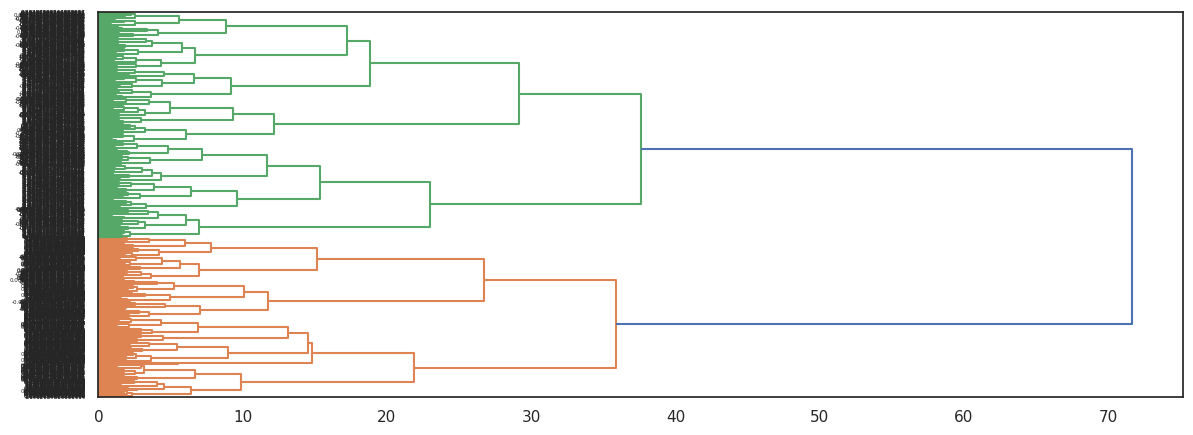

In [532]:
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(14,5)})

dn = dendrogram(distancias,
                leaf_font_size=4,
                orientation='right',
                labels=df_scaled['Income'].values)

### Atividade 7: Encontre a quantidade que parece adequada para o número de grupos.
Dicas:
* Faça a análise a partir do dendrograma acima, escolha uma quantidade de clusters que parecer adequada e crie uma coluna com o nome `grupos` no dataframe.
* Adicione a coluna `grupos` ao dataframe contendo todas as variáveis (e não somente aquelas utilizadas para os agrupamentos), assim você poderá fazer uma análise mais ampla dos consumidores.
* Para o propósito deste exercício, utilize um `máximo` de 4 grupos para permitir uma boa visualização nas etapas a seguir.

In [533]:
# Importando a função fcluster
from scipy.cluster.hierarchy import fcluster

# Distância máxima
max_d = 3

# obtendo grupos levando em consideração a distância
grupos = fcluster(distancias, t=max_d, criterion='maxclust')

df2['grupos'] = grupos

df.head()

,Recency,Days_Registered,MntTotal,Income
0,58,849,1445,58138.0
1,38,299,25,46344.0
2,26,498,665,71613.0
3,26,325,43,26646.0
4,94,347,376,58293.0


In [534]:
# Categorirando  as colunas por grupos
df2['grupos'] = grupos
df2.head()


,Income,Recency,Days_Registered,MntTotal,grupos
0,1730.0,65.0,228.0,7.0,3
1,2447.0,42.0,725.0,1729.0,1
2,3502.0,56.0,628.0,5.0,2
3,4023.0,29.0,192.0,8.0,2
4,4428.0,0.0,453.0,357.0,2


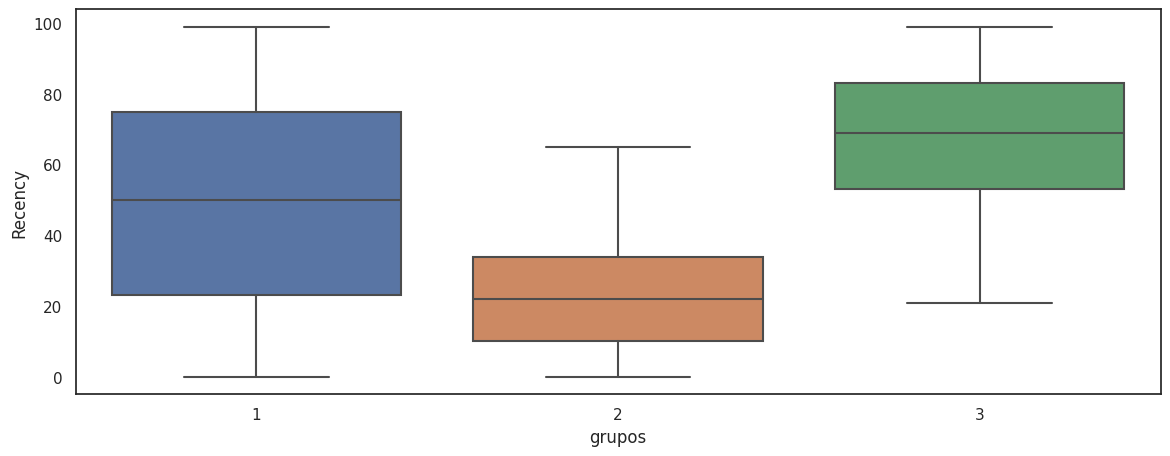

In [535]:
sns.set(style='white', rc={'figure.figsize':(14,5)})

# boxplot da variável Recency
sns.boxplot(data=df2, x='grupos', y='Recency');

In [536]:
# observado o DataFrame
df2

,Income,Recency,Days_Registered,MntTotal,grupos
0,1730.0,65.0,228.0,7.0,3
1,2447.0,42.0,725.0,1729.0,1
2,3502.0,56.0,628.0,5.0,2
3,4023.0,29.0,192.0,8.0,2
4,4428.0,0.0,453.0,357.0,2
...,...,...,...,...,...
1964,157146.0,13.0,612.0,1728.0,1
1965,157243.0,98.0,306.0,1607.0,1
1966,157733.0,37.0,576.0,57.0,1
1967,160803.0,21.0,880.0,1700.0,1


In [537]:
# Avaliando DataFrame df2
df2.describe()

,Income,Recency,Days_Registered,MntTotal,grupos
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,52274.703403,49.087650,537.431818,572.667428,1.922803
std,21486.322235,28.838933,201.219941,569.432178,0.863754
min,1730.000000,0.000000,186.000000,5.000000,1.000000
25%,35688.000000,25.000000,366.000000,63.000000,1.000000
50%,51717.000000,49.000000,536.000000,372.000000,2.000000
75%,68682.000000,74.000000,712.000000,970.000000,3.000000
max,162397.000000,99.000000,885.000000,2431.000000,3.000000


### Atividade 8: Crie Gráficos para visualizar os Grupos.

#### Atividade 8.1: Crie Visualizações em Boxplot
Dica: utilize o Seaborn para criar boxplots com os clusters selecionados.

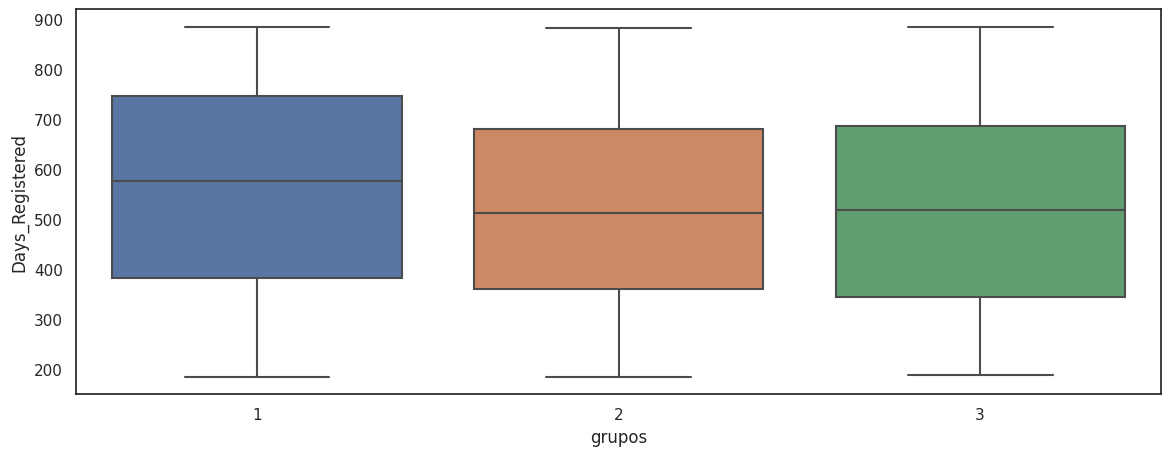

In [538]:
# boxplot da variável Days_Registered
sns.boxplot(data=df2, x='grupos', y='Days_Registered');

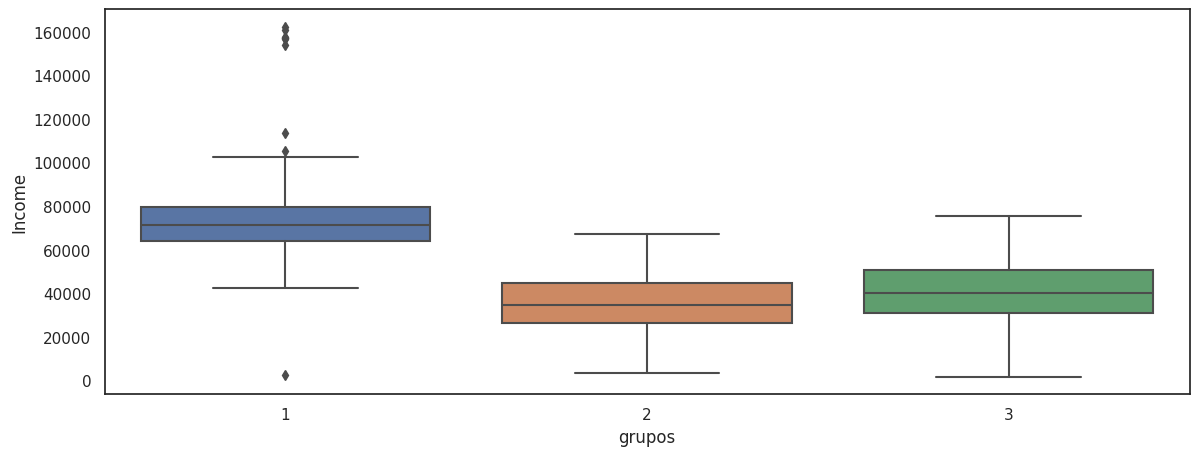

In [539]:
# boxplot da variável C
sns.boxplot(data=df2, x='grupos', y='Income');

#### Atividade 8.2: Crie Histogramas para visualizar os Grupos
Dica: utilize o Seaborn para plotar histogramas dos clusters selecionados.

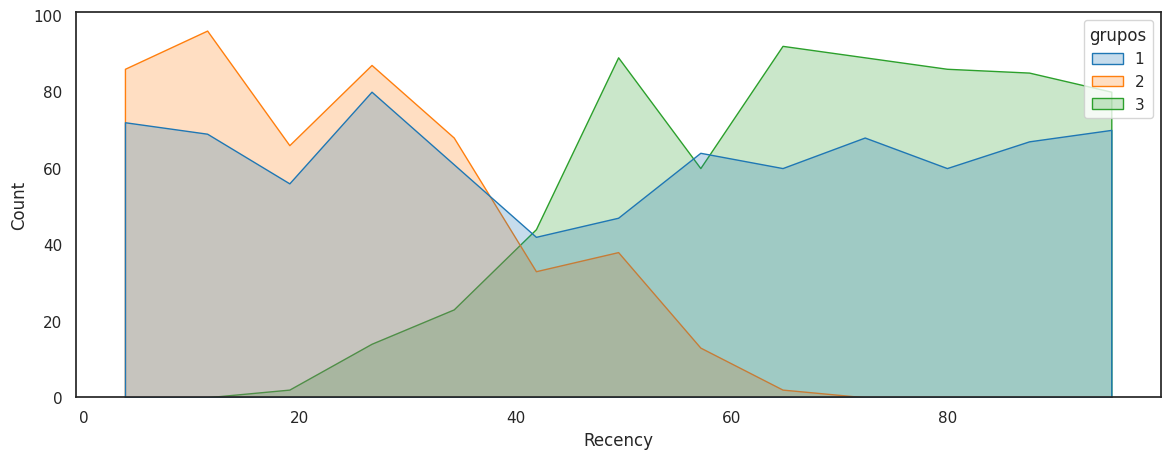

In [540]:
# histograma da variável Recency
sns.histplot(data=df2, x='Recency', hue='grupos', element='poly', palette='tab10');

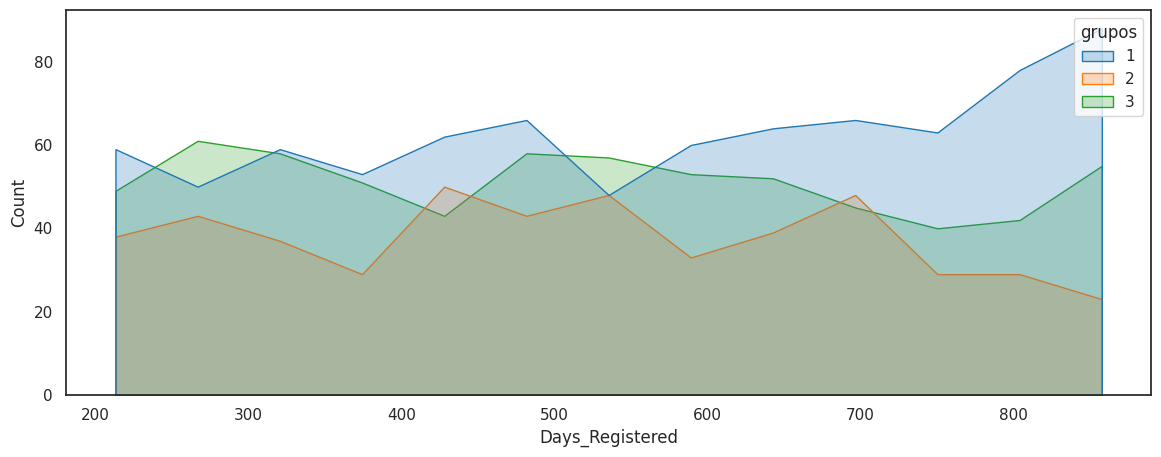

In [541]:
# histograma da variável Days_Registered
sns.histplot(data=df2, x='Days_Registered', hue='grupos', element='poly', palette='tab10');

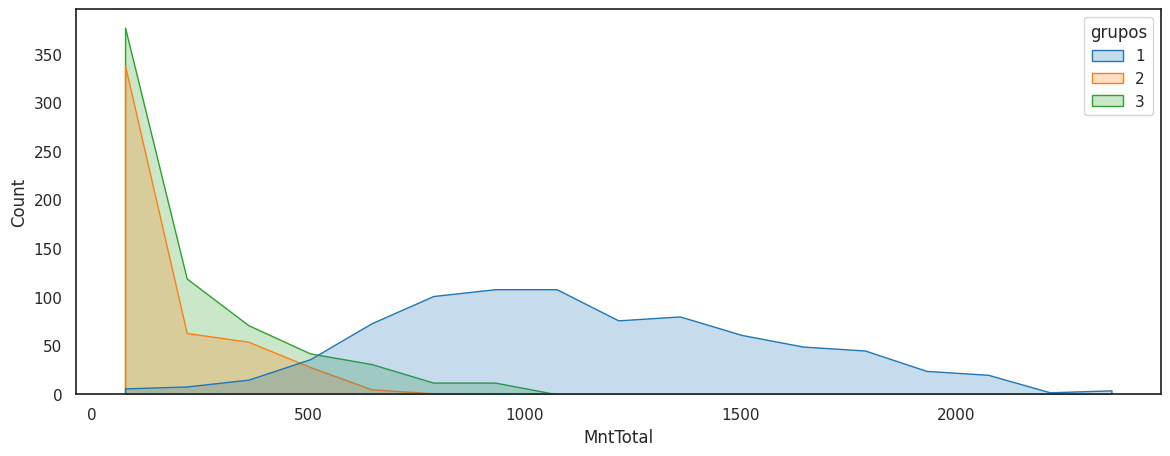

In [542]:
# histograma da variável MntTotal
sns.histplot(data=df2, x='MntTotal', hue='grupos', element='poly', palette='tab10');

### Atividade 9: Faça uma análise de cada grupo a fim de criar uma descrição adequada dele (persona).

In [543]:
# adicionando a coluna com os grupos
df2

,Income,Recency,Days_Registered,MntTotal,grupos
0,1730.0,65.0,228.0,7.0,3
1,2447.0,42.0,725.0,1729.0,1
2,3502.0,56.0,628.0,5.0,2
3,4023.0,29.0,192.0,8.0,2
4,4428.0,0.0,453.0,357.0,2
...,...,...,...,...,...
1964,157146.0,13.0,612.0,1728.0,1
1965,157243.0,98.0,306.0,1607.0,1
1966,157733.0,37.0,576.0,57.0,1
1967,160803.0,21.0,880.0,1700.0,1


Descrição dos Grupos:

* O grupo 1 é composto por pessoas que [...].

* O grupo 2 é composto por pessoas que [...].

* O grupo (n) é composto por pessoas que [...].

In [544]:
# separando os em 3 grupos
grupo1 = df2[df2['grupos'] == 1]
grupo2 = df2[df2['grupos'] == 2]
grupo3 = df2[df2['grupos'] == 3]


In [545]:
# Visualizando grupo1
grupo1

,Income,Recency,Days_Registered,MntTotal,grupos
1,2447.0,42.0,725.0,1729.0,1
718,42564.0,28.0,729.0,774.0,1
740,43185.0,88.0,631.0,621.0,1
779,44529.0,98.0,545.0,674.0,1
785,44802.0,71.0,863.0,1036.0,1
...,...,...,...,...,...
1964,157146.0,13.0,612.0,1728.0,1
1965,157243.0,98.0,306.0,1607.0,1
1966,157733.0,37.0,576.0,57.0,1
1967,160803.0,21.0,880.0,1700.0,1


In [546]:
# estatísticas descritivas do grupo 1
grupo1.describe()

,Income,Recency,Days_Registered,MntTotal,grupos
count,816.000000,816.000000,816.000000,816.000000,816.0
mean,72165.441176,49.179330,559.634804,1133.865605,1.0
std,13713.644443,29.691268,206.874144,437.602605,0.0
min,2447.000000,0.000000,186.000000,5.000000,1.0
25%,63908.000000,23.000000,382.500000,805.500000,1.0
50%,71379.000000,50.000000,577.000000,1082.000000,1.0
75%,79596.500000,75.000000,747.000000,1435.500000,1.0
max,162397.000000,99.000000,884.000000,2431.000000,1.0


In [547]:
# características do grupo 1 / Income 
grupo1_lista = ['75% possui menos de 63908.0',
                '75% possui menos de 71379.0',
                '75% possui mais de 79596.5']

In [548]:
# Visualizando grupo2
grupo2

,Income,Recency,Days_Registered,MntTotal,grupos
2,3502.0,56.0,628.0,5.0,2
3,4023.0,29.0,192.0,8.0,2
4,4428.0,0.0,453.0,357.0,2
5,4861.0,20.0,193.0,5.0,2
6,5305.0,12.0,520.0,31.0,2
...,...,...,...,...,...
1273,61905.0,2.0,331.0,225.0,2
1289,62499.0,0.0,388.0,222.0,2
1380,65324.0,0.0,355.0,523.0,2
1401,65808.0,1.0,216.0,259.0,2


In [549]:
# estatísticas descritivas do grupo 2
grupo2.describe()

,Income,Recency,Days_Registered,MntTotal,grupos
count,489.000000,489.000000,489.000000,489.000000,489.0
mean,35291.100204,23.063906,518.061179,140.431493,2.0
std,12355.157697,15.425253,188.772488,151.909401,0.0
min,3502.000000,0.000000,186.000000,5.000000,2.0
25%,26518.000000,10.000000,361.000000,35.000000,2.0
50%,34728.000000,22.000000,514.000000,65.000000,2.0
75%,44551.000000,34.000000,681.000000,213.000000,2.0
max,67267.000000,65.000000,882.000000,727.000000,2.0


In [550]:
# características do grupo 2 / Recency
grupo2_lista = ['75% possui menos de 10.0',
                '75% possui menos de 22.0',
                '75% possui mais de 65.0']

In [551]:
# Visualizando grupo3
grupo3

,Income,Recency,Days_Registered,MntTotal,grupos
0,1730.0,65.0,228.0,7.0,3
7,5648.0,68.0,294.0,48.0,3
9,6835.0,76.0,754.0,135.0,3
10,7144.0,92.0,390.0,411.0,3
12,8028.0,62.0,835.0,171.0,3
...,...,...,...,...,...
1524,70337.0,75.0,364.0,551.0,3
1542,70829.0,87.0,396.0,359.0,3
1575,71866.0,85.0,372.0,612.0,3
1613,73395.0,94.0,289.0,377.0,3


In [552]:
# estatísticas descritivas do grupo 3
grupo3.describe()

,Income,Recency,Days_Registered,MntTotal,grupos
count,664.000000,664.000000,664.000000,664.000000,664.0
mean,40338.167169,68.140060,524.411647,201.320532,3.0
std,13581.011436,18.623704,200.736070,215.822317,0.0
min,1730.000000,21.000000,189.000000,6.000000,3.0
25%,30837.750000,53.000000,345.000000,45.000000,3.0
50%,40275.000000,69.000000,519.500000,96.500000,3.0
75%,50546.250000,83.000000,687.500000,292.500000,3.0
max,75342.000000,99.000000,885.000000,978.000000,3.0


In [553]:
# características do grupo 3 / MntTotal
grupo3_lista = ['75% possui menos de 45.0',
                '75% possui menos de 96.5',
                '75% possui mais de 978.0']

In [554]:
dicio_grupos = {'grupo 1':grupo1_lista,
                'grupo 2':grupo2_lista,
                'grupo 3':grupo3_lista}

In [555]:
personas = pd.DataFrame(dicio_grupos, index=['Income','Recency','MntTotal'])
personas

,grupo 1,grupo 2,grupo 3
Income,75% possui menos de 63908.0,75% possui menos de 10.0,75% possui menos de 45.0
Recency,75% possui menos de 71379.0,75% possui menos de 22.0,75% possui menos de 96.5
MntTotal,75% possui mais de 79596.5,75% possui mais de 65.0,75% possui mais de 978.0


In [556]:
df2.corr()


,Income,Recency,Days_Registered,MntTotal,grupos
Income,1.000000,0.004232,-0.010037,0.783272,-0.661395
Recency,0.004232,1.000000,0.021343,0.013917,0.256536
Days_Registered,-0.010037,0.021343,1.000000,0.172209,-0.078244
MntTotal,0.783272,0.013917,0.172209,1.000000,-0.727833
grupos,-0.661395,0.256536,-0.078244,-0.727833,1.000000


### Para refletir: 


####Quais outras variáveis poderíamos combinar ou processar para obter análises mais precisas?

Exemplo: e se comparássemos o valor gasto com a faixa de salário para entender esses valores percentualmente?

####Como poderíamos usar uma variável categórica para realizar agrupamento?

Dica:  Pesquise sobre One Hot Encoding

In [557]:
# Importação da base de dados direto do Drive
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Atividades Siruis/customer_supermarket.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [558]:
# Avalianado todas as colunas 
pd.pandas.set_option('display.max_columns', None)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,04-09-2020,849,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,08-03-2022,299,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,21-08-2021,498,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,10-02-2022,325,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,19-01-2022,347,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [559]:
# Extraindo apenas os valores excluindo N/D nas Colunas 
df.dropna(inplace=True)

In [560]:
# Padronizando  ultilizando  apenas as colunas ( Income, Education)
df = df[['Income','Education']]
df.head()

,Income,Education
0,58138.0,Graduation
1,46344.0,Graduation
2,71613.0,Graduation
3,26646.0,Graduation
4,58293.0,PhD


In [561]:
# Quantos tipos unicos no DataFrame
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [562]:
# Transformando categoria [2n Cycle'] p/ ['Master'] obetendo 3 categoria  para analise 
df['Education'] = df['Education'] .str.replace('2n Cycle','Master')

In [563]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

In [564]:
# Obetando os Valores 
df['Education'].value_counts()

Graduation    1116
Master         565
PhD            481
Basic           54
Name: Education, dtype: int64

In [565]:
# com tecnica  One Hot Encoding

In [566]:
df =pd.get_dummies(df,columns=['Education'], prefix='')
df.head()

,Income,_Basic,_Graduation,_Master,_PhD
0,58138.0,0,1,0,0
1,46344.0,0,1,0,0
2,71613.0,0,1,0,0
3,26646.0,0,1,0,0
4,58293.0,0,0,0,1


In [567]:
#Retirando o valor mesnor para análise 
df.drop('_Basic', axis=1 , inplace=True)
df.head()

,Income,_Graduation,_Master,_PhD
0,58138.0,1,0,0
1,46344.0,1,0,0
2,71613.0,1,0,0
3,26646.0,1,0,0
4,58293.0,0,0,1


In [568]:
df.corr()

,Income,_Graduation,_Master,_PhD
Income,1.000000,0.018935,-0.027899,0.081552
_Graduation,0.018935,1.000000,-0.589232,-0.530345
_Master,-0.027899,-0.589232,1.000000,-0.308016
_PhD,0.081552,-0.530345,-0.308016,1.000000


In [569]:
# One Hot Encoding  é usado para criar variáveis numéricas que sejam representativas de categorias.
# Isso permite que os algoritmos de aprendizado de máquina usem essas variáveis para criar modelos. 
# a partir das equipes participantes, onde cada equipe é representada por uma variável binária.
 # Metodo é usando para descriminar algumas  expecificações como calcular variaveis não númerica ou seja expecificando e padronizando os dados 
 # para esse exmplo foi  feito a correlação acima 